# Simulation of feature shift with Feature-CSBM

In [1]:
import math
import matplotlib.pyplot as plt

from csbm import MultiClassCSBM, FeatureCSBM

In [2]:
n = 80
c = 8
t = 13

In [3]:
time_steps = [1]

csbm = MultiClassCSBM(n=n, classes=c)
csbm_feat = FeatureCSBM(n=n, classes=c)

mmd = [csbm.get_per_class_feature_shift_mmd_with_rbf_kernel()]
mmd_feat = [csbm_feat.get_per_class_feature_shift_mmd_with_rbf_kernel()]

class_means_shift = [csbm_feat.get_average_distance_between_curr_and_init_mean()]
mean_pairwise_distance_all = [csbm_feat.get_average_pairwise_mean_distance()]
mean_pairwise_distance_neighbors = [csbm_feat.get_average_distance_from_neighboring_means()]
mean_pairwise_distance_non_neighbors = [csbm_feat.get_average_pairwise_distance_from_non_neighboring_means()]

for tau in range(1, t):
    time_steps.append(tau + 1)
    
    csbm.evolve()
    mmd.append(csbm.get_per_class_feature_shift_mmd_with_rbf_kernel())

    csbm_feat.evolve()
    mmd_feat.append(csbm_feat.get_per_class_feature_shift_mmd_with_rbf_kernel())
    
    class_means_shift.append(csbm_feat.get_average_distance_between_curr_and_init_mean())
    mean_pairwise_distance_all.append(csbm_feat.get_average_pairwise_mean_distance())
    mean_pairwise_distance_neighbors.append(csbm_feat.get_average_distance_from_neighboring_means())
    mean_pairwise_distance_non_neighbors.append(csbm_feat.get_average_pairwise_distance_from_non_neighboring_means())

## Plot feature shifts of standard and feature CSBM and how the class means move

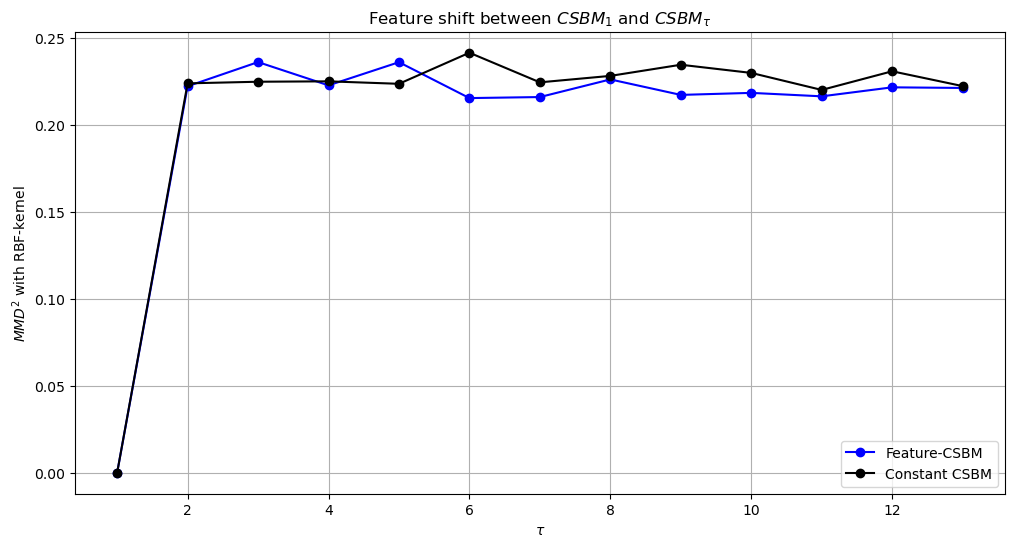

In [4]:
plt.figure(figsize=(12, 6))

plt.plot(time_steps, mmd_feat, marker='o', linestyle='-', color='b', label='Feature-CSBM')
plt.plot(time_steps, mmd, marker='o', linestyle='-', color='black', label='Constant CSBM')

plt.title(r'Feature shift between $CSBM_{1}$ and $CSBM_{\tau}$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$MMD^{2}$ with RBF-kernel')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('feature_shift.pdf', format='pdf')
plt.show()
plt.close()

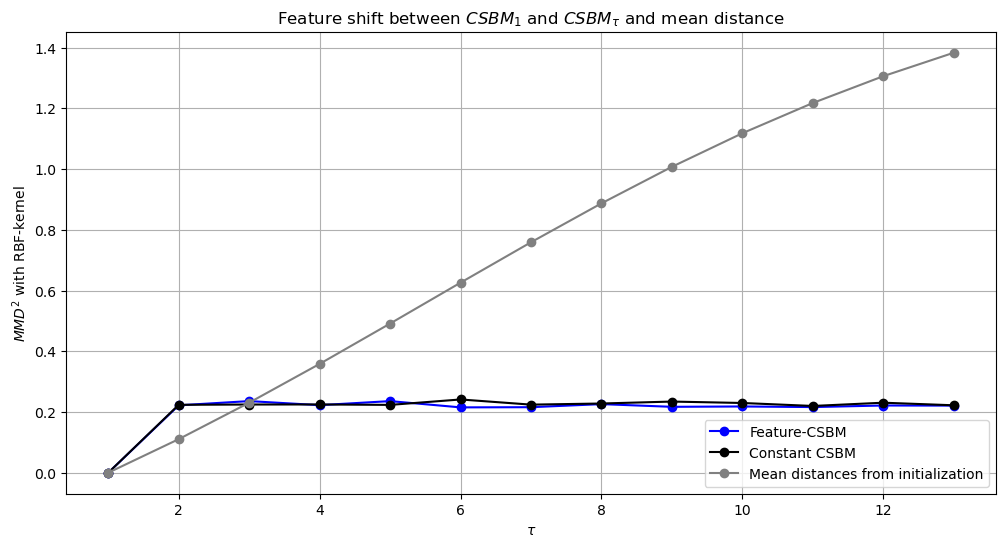

In [5]:
plt.figure(figsize=(12, 6))

plt.plot(time_steps, mmd_feat, marker='o', linestyle='-', color='b', label='Feature-CSBM')
plt.plot(time_steps, mmd, marker='o', linestyle='-', color='black', label='Constant CSBM')
plt.plot(time_steps, class_means_shift, marker='o', linestyle='-', color='gray', label='Mean distances from initialization')

plt.title(r'Feature shift between $CSBM_{1}$ and $CSBM_{\tau}$ and mean distance')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$MMD^{2}$ with RBF-kernel')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('feature_shift_with_mean_distance.pdf', format='pdf')
plt.show()
plt.close()

## Plot how the class means behave

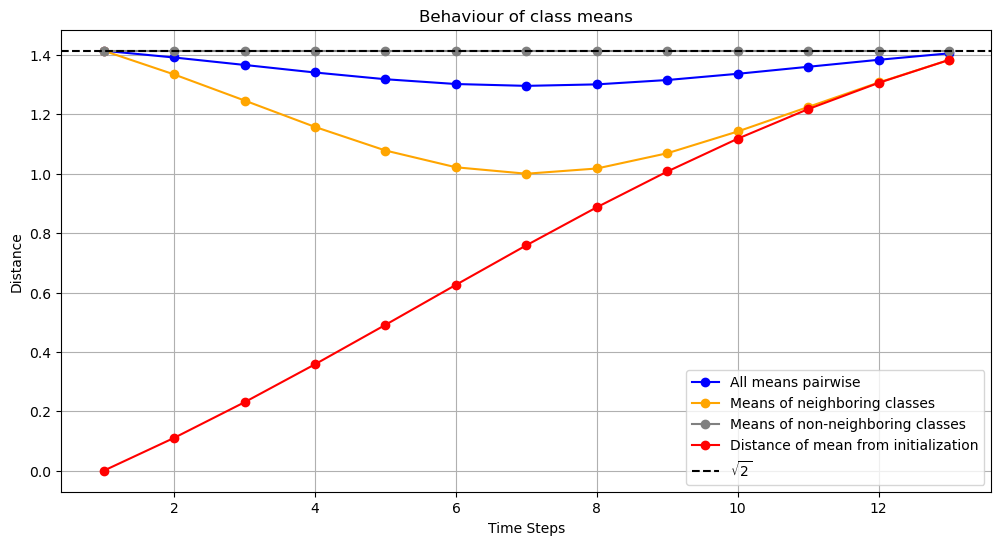

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(time_steps, mean_pairwise_distance_all, marker='o', linestyle='-', color='blue', label='All means pairwise')
plt.plot(time_steps, mean_pairwise_distance_neighbors, marker='o', linestyle='-', color='orange', label='Means of neighboring classes')
plt.plot(time_steps, mean_pairwise_distance_non_neighbors, marker='o', linestyle='-', color='gray', label='Means of non-neighboring classes')
plt.plot(time_steps, class_means_shift, marker='o', linestyle='-', color='red', label='Distance of mean from initialization')
plt.axhline(y=math.sqrt(2), color='black', linestyle='--', label=r'$\sqrt{2}$')

plt.title('Behaviour of class means')
plt.xlabel('Time Steps')
plt.ylabel('Distance')
plt.grid(True)
plt.legend(loc='lower right')
plt.savefig('class_means_behaviour.pdf', format='pdf')
plt.show()
plt.close()